In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\chukw\Downloads\ML, AI\Udemy ML\data\mouse_viral_study.csv")
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


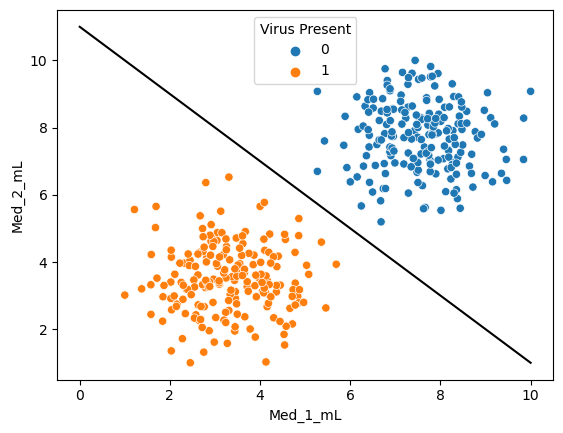

In [3]:
plt.figure(dpi = 100)
sns.scatterplot(data = df, x = 'Med_1_mL', y = 'Med_2_mL', hue = 'Virus Present');

#hyperplane(2d)

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y, 'black');
plt.show();

In [4]:
from sklearn.svm import SVC

In [5]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

In [6]:
y = df["Virus Present"]

In [7]:
X = df.drop("Virus Present", axis = 1)

In [8]:
model = SVC(kernel = 'linear', C = 1000)
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [9]:
from svm_margin_plot import plot_svm_boundary

C:\Users\chukw\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


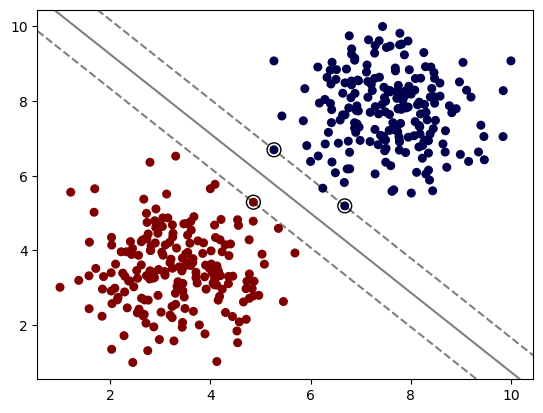

In [10]:
plot_svm_boundary(model,X,y)

In [11]:
model_2 = SVC(kernel = 'rbf', C = 100)
model_2.fit(X,y)

SVC(C=100)

C:\Users\chukw\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


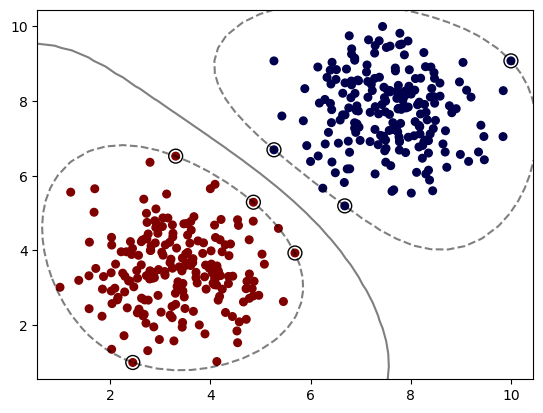

In [12]:
from svm_margin_plot import plot_svm_boundary

plot_svm_boundary(model_2,X,y)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [14]:
model_svm = SVC()
param_grid = {"kernel":[ "rbf", "linear", "poly"],"C":[0.01, 0.1, 1]}

In [15]:
grid = GridSearchCV(model_svm, param_grid)

In [16]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear', 'poly']})

In [17]:
#help(grid)

In [18]:
grid.best_params_

{'C': 0.01, 'kernel': 'rbf'}

In [19]:
predictions = grid.predict([[1.580321,2.440562]])

C:\Users\chukw\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [20]:
predictions

array([1], dtype=int64)

## Classification

In [21]:
df = pd.read_csv(r"C:\Users\chukw\Downloads\ML, AI\Udemy ML\data\cement_slump.csv")
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [22]:
df.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000
mean,229.894175,77.973786,149.014563,197.167961,8.539806,883.978641,739.604854,18.048544,49.61068,36.038738
std,78.877230,60.461363,85.418080,20.208158,2.807530,88.391393,63.342117,8.750844,17.56861,7.837120
min,137.000000,0.000000,0.000000,160.000000,4.400000,708.000000,640.600000,0.000000,20.00000,17.190000
25%,152.000000,0.050000,115.500000,180.000000,6.000000,819.500000,684.500000,14.500000,38.50000,30.900000
50%,248.000000,100.000000,164.000000,196.000000,8.000000,879.000000,742.700000,21.500000,54.00000,35.520000
75%,303.900000,125.000000,235.950000,209.500000,10.000000,952.800000,788.000000,24.000000,63.75000,41.205000
max,374.000000,193.000000,260.000000,240.000000,19.000000,1049.900000,902.000000,29.000000,78.00000,58.530000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [24]:
# Calculate the entire correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Extract the correlations for the specific column
compressive_strength_corr = corr_matrix["Compressive Strength (28-day)(Mpa)"]

# Display the result
print(compressive_strength_corr.sort_values(ascending = False))


Compressive Strength (28-day)(Mpa)    1.000000
Cement                                0.445656
Fly ash                               0.444380
SP                                   -0.037909
FLOW(cm)                             -0.124189
Fine Aggr.                           -0.154532
Coarse Aggr.                         -0.160610
SLUMP(cm)                            -0.223499
Water                                -0.254320
Slag                                 -0.331522
Name: Compressive Strength (28-day)(Mpa), dtype: float64


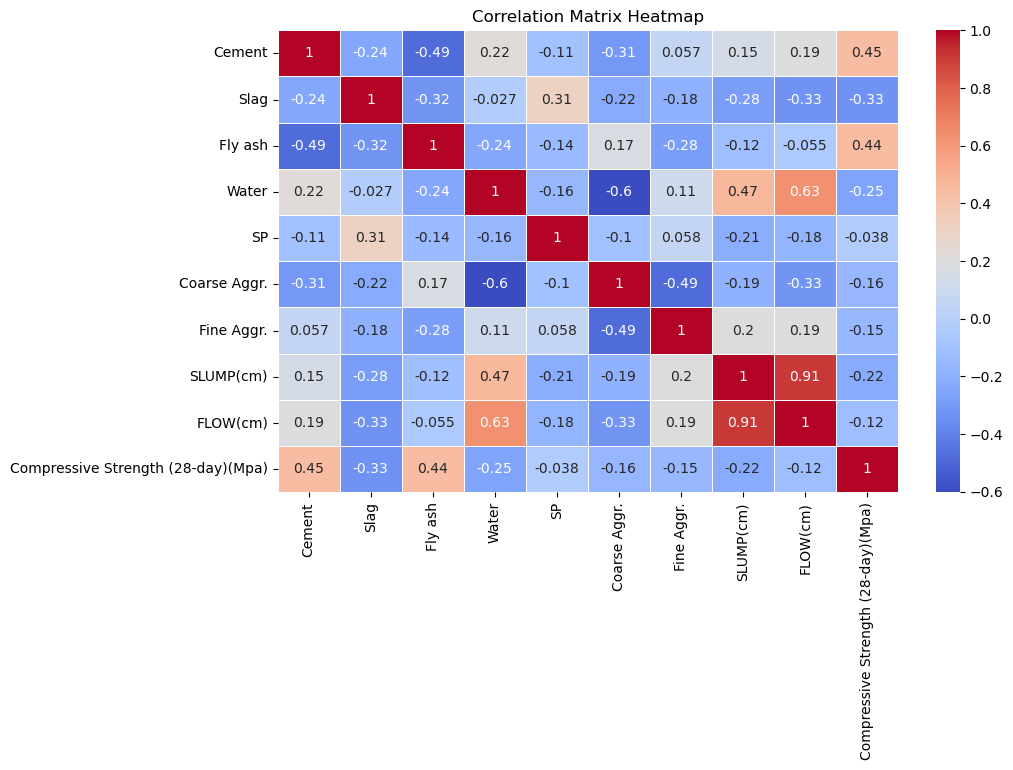

In [25]:
corr_matrix = df.corr()

# Display the correlation matrix
#print(corr_matrix)

# Optional: Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

## Base model vs Parametized model

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#help(train_test_split)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [31]:
from sklearn.svm import SVR,LinearSVR

In [32]:
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomput

In [33]:
base_model = SVR()
base_model.fit(scaled_X_train, y_train)
base_preds = base_model.predict(scaled_X_test)

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [35]:
mean_absolute_error(y_test, base_preds)

0.06829339021666349

In [36]:
mean_squared_error(y_test, base_preds)

0.007960330574115883

### Cross Validation

In [43]:
model_1 = SVR()
param_grid = {"kernel": ["rbf", "linear", "poly"], "degree": [2,3,4], "C": [0.01, 0.1,1,2], "gamma": ["scale", 'auto'],
             "epsilon": [0, 0.01, 0.1, 0.5, 1,2]}

In [42]:
#help(model_1)

In [44]:
from sklearn.model_selection import GridSearchCV
grid_2 = GridSearchCV(model_1, param_grid)

In [45]:
grid_2.fit(scaled_X_train, y_train)
grid_2.best_params_

{'C': 2, 'degree': 2, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}

In [48]:
grid_2_preds = grid_2.predict(scaled_X_test)

In [49]:
mean_absolute_error(y_test, grid_2_preds)

0.021328428304013252

In [51]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, grid_2_preds)
print(r2)

0.9844093392719238
